<a href="https://colab.research.google.com/github/Shafiq-Abdu/Tutorial/blob/main/jpmorgan_quant_forage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 : Predict the price

<ipython-input-4-e10225c5eedb>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


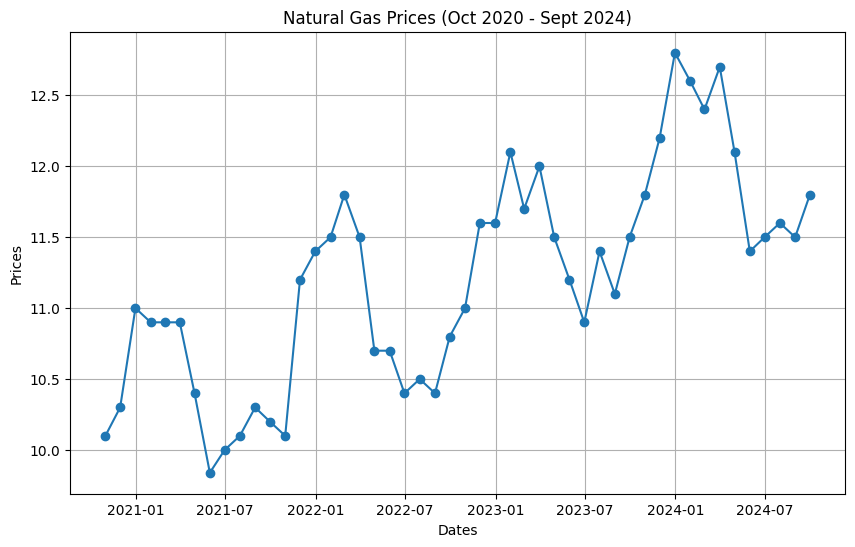

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Nat_Gas.csv')

# Convert the 'Date' column to datetime format
data['Dates'] = pd.to_datetime(data['Dates'])

# Plot the data to visualize
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], marker='o')
plt.title('Natural Gas Prices (Oct 2020 - Sept 2024)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.show()


Fitting Linear Model

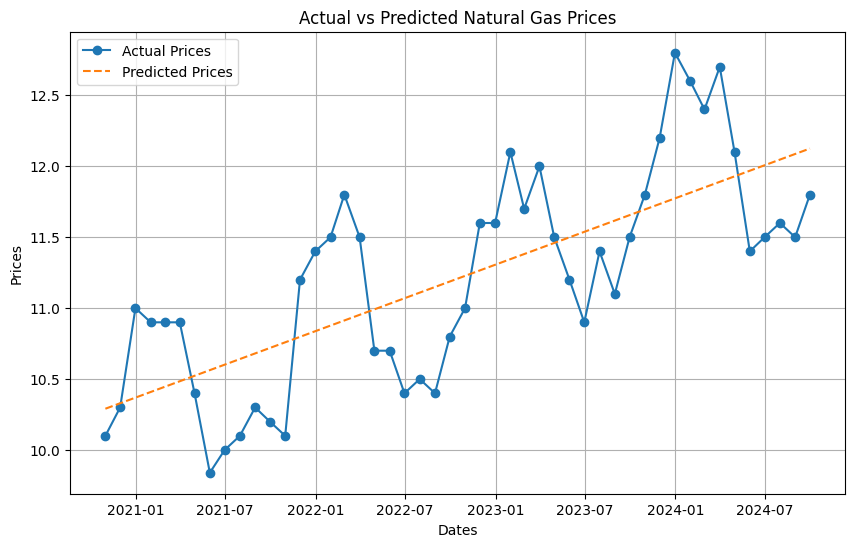

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to ordinal format for modeling
data['Date_ordinal'] = data['Dates'].map(pd.Timestamp.toordinal)

# Fit a linear regression model
X = data['Date_ordinal'].values.reshape(-1, 1)
y = data['Prices'].values
model = LinearRegression()
model.fit(X, y)

# Predict prices for the existing dates
predicted_prices = model.predict(X)

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices', marker='o')
plt.plot(data['Dates'], predicted_prices, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted Natural Gas Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()


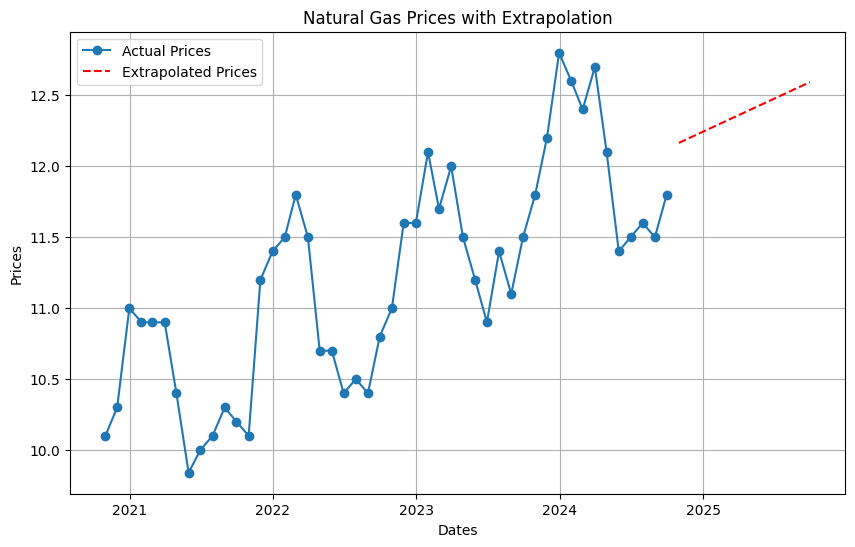

In [ ]:
# Generate future dates for 1 year ahead
future_dates = pd.date_range(start='2024-10-01', end='2025-09-30', freq='M')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal)

# Predict prices for future dates
future_prices = model.predict(future_dates_ordinal.values.reshape(-1, 1))

# Plot the extrapolated future prices
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices', marker='o')
plt.plot(future_dates, future_prices, label='Extrapolated Prices', linestyle='--', color='red')
plt.title('Natural Gas Prices with Extrapolation')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def estimate_price(input_date):
    # Convert input date to ordinal
    input_date = pd.to_datetime(input_date)
    input_date_ordinal = input_date.toordinal()

    # Predict the price for the input date
    estimated_price = model.predict([[input_date_ordinal]])

    return estimated_price[0]

# Example usage
input_date = '2025-05-15'
print(f"Estimated price for {input_date}: {estimate_price(input_date)}")


Estimated price for 2025-05-15: 12.415934179097917


<ipython-input-12-1433b28c4401>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


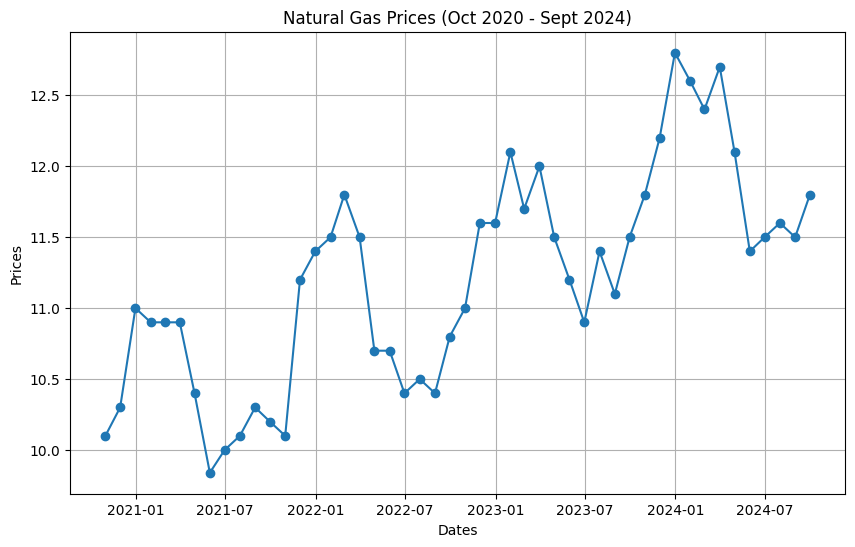

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Nat_Gas.csv')

# Convert the 'Dates' column to datetime format
data['Dates'] = pd.to_datetime(data['Dates'])

# Plot the data to visualize
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], marker='o')
plt.title('Natural Gas Prices (Oct 2020 - Sept 2024)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.show()


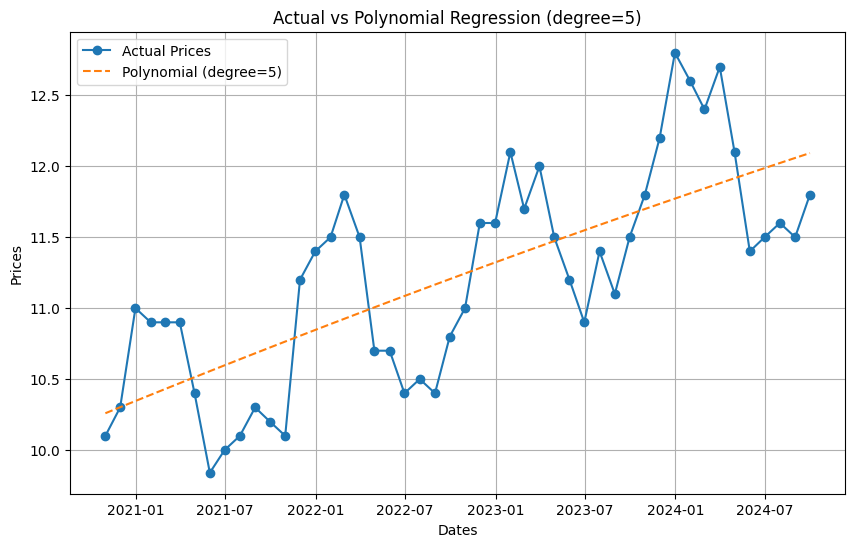

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Convert 'Dates' to ordinal format for modeling
data['Dates_ordinal'] = data['Dates'].map(pd.Timestamp.toordinal)

# Extract X and y values
X = data['Dates_ordinal'].values.reshape(-1, 1)
y = data['Prices'].values

# Define the degree of the polynomial
degree = 5

# Create a pipeline for polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the ordinal date and prices
poly_model.fit(X, y)

# Predict prices with the polynomial model
predicted_prices_poly = poly_model.predict(X)

# Plot the actual vs polynomial predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices', marker='o')
plt.plot(data['Dates'], predicted_prices_poly, label=f'Polynomial (degree={degree})', linestyle='--')
plt.title(f'Actual vs Polynomial Regression (degree={degree})')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()


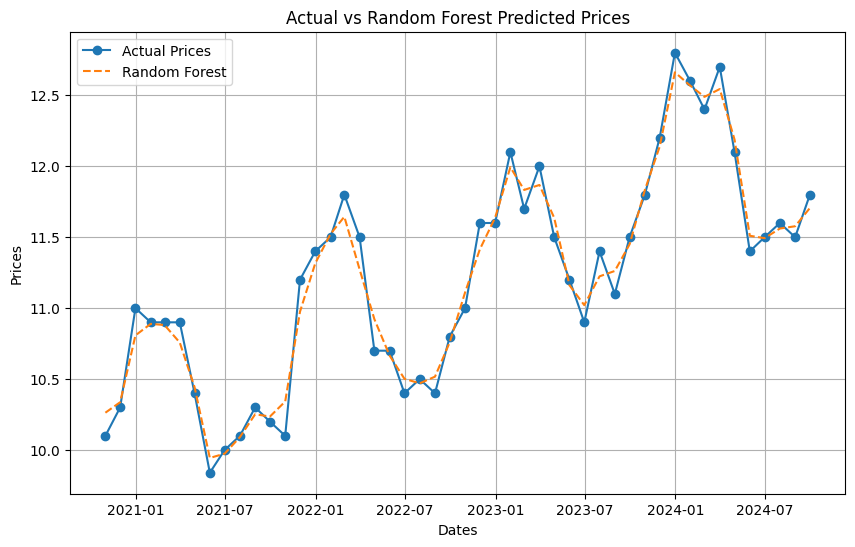

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predict prices with the Random Forest model
predicted_prices_rf = rf_model.predict(X)

# Plot the actual vs Random Forest predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices', marker='o')
plt.plot(data['Dates'], predicted_prices_rf, label='Random Forest', linestyle='--')
plt.title('Actual vs Random Forest Predicted Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()


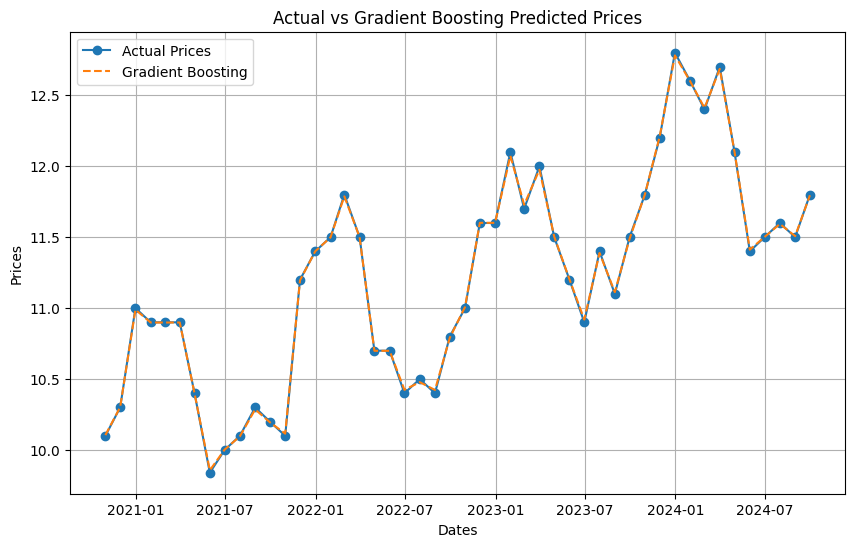

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X, y)

# Predict prices with the Gradient Boosting model
predicted_prices_gb = gb_model.predict(X)

# Plot the actual vs Gradient Boosting predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices', marker='o')
plt.plot(data['Dates'], predicted_prices_gb, label='Gradient Boosting', linestyle='--')
plt.title('Actual vs Gradient Boosting Predicted Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()


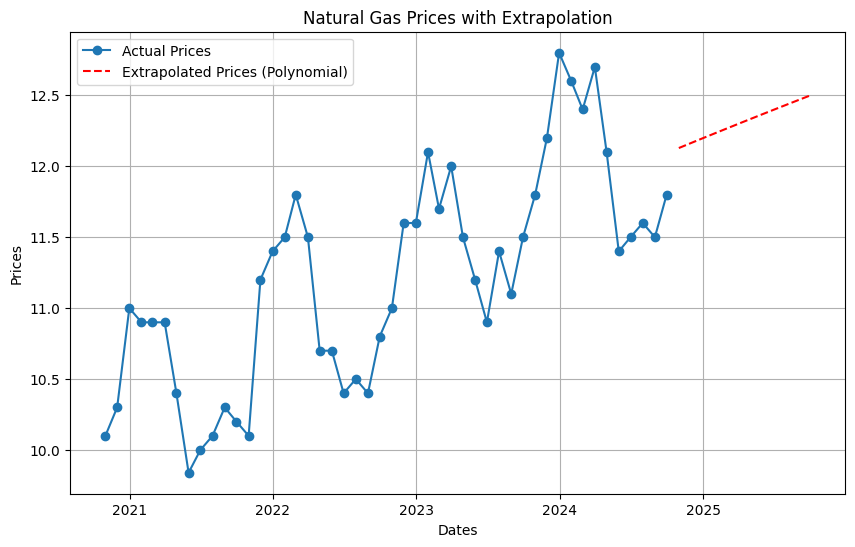

**Complete code again**

<ipython-input-18-1433b28c4401>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


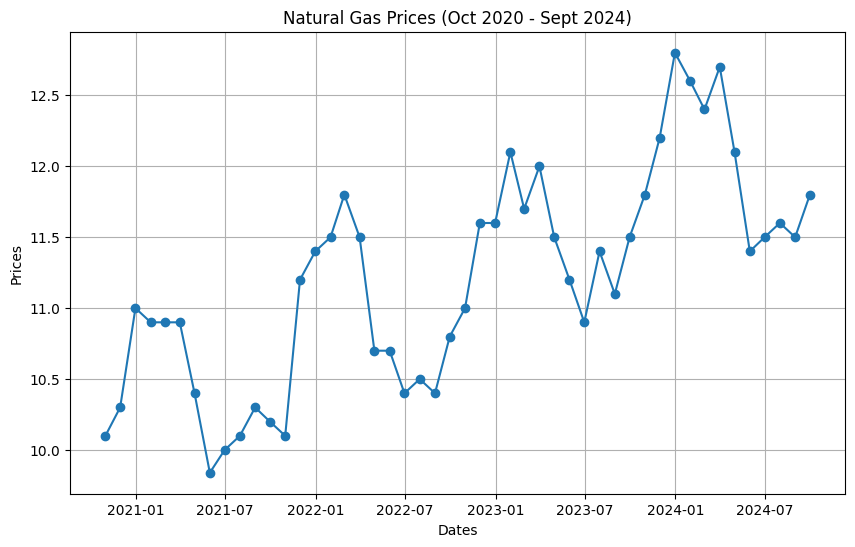

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Nat_Gas.csv')

# Convert the 'Dates' column to datetime format
data['Dates'] = pd.to_datetime(data['Dates'])

# Plot the data to visualize
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], marker='o')
plt.title('Natural Gas Prices (Oct 2020 - Sept 2024)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.show()


Mean Squared Error: 0.0001


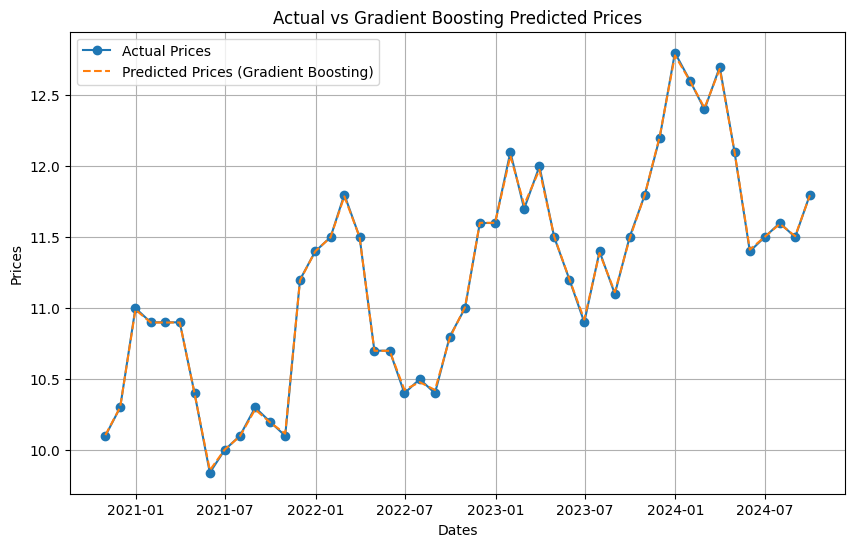

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Convert 'Dates' to ordinal format for modeling
data['Dates_ordinal'] = data['Dates'].map(pd.Timestamp.toordinal)

# Extract features and target
X = data['Dates_ordinal'].values.reshape(-1, 1)
y = data['Prices'].values

# Create and fit a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X, y)

# Predict prices with the Gradient Boosting model
predicted_prices_gb = gb_model.predict(X)

# Calculate Mean Squared Error for evaluation
mse = mean_squared_error(y, predicted_prices_gb)
print(f"Mean Squared Error: {mse:.4f}")

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices', marker='o')
plt.plot(data['Dates'], predicted_prices_gb, label='Predicted Prices (Gradient Boosting)', linestyle='--')
plt.title('Actual vs Gradient Boosting Predicted Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()


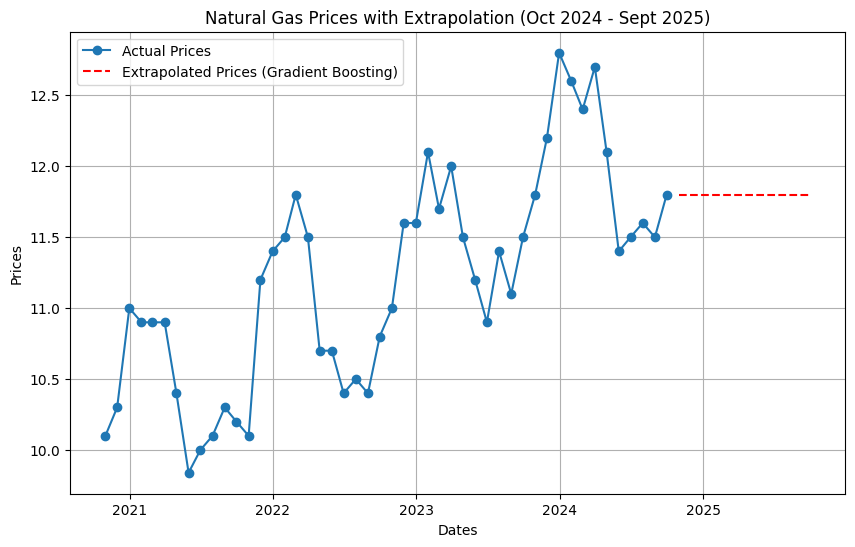

In [ ]:
# Generate future dates for 1 year ahead
future_dates = pd.date_range(start='2024-10-01', end='2025-09-30', freq='M')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal)

# Predict future prices using the Gradient Boosting model
future_prices_gb = gb_model.predict(future_dates_ordinal.values.reshape(-1, 1))

# Plot future predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices', marker='o')
plt.plot(future_dates, future_prices_gb, label='Extrapolated Prices (Gradient Boosting)', linestyle='--', color='red')
plt.title('Natural Gas Prices with Extrapolation (Oct 2024 - Sept 2025)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def predict_price(date_str):
    # Convert the input date string to a datetime object
    input_date = pd.to_datetime(date_str)

    # Convert the datetime to an ordinal number
    input_date_ordinal = input_date.toordinal()

    # Predict the price using the Gradient Boosting model
    predicted_price = gb_model.predict(np.array([[input_date_ordinal]]))

    return predicted_price[0]

# Example: Predict the price for a given date
input_date = '2025-06-15'
predicted_price = predict_price(input_date)
print(f"Predicted Price for {input_date}: {predicted_price:.2f}")


Predicted Price for 2025-06-15: 11.80


In [ ]:
input_date = '2024-12-15'
predicted_price = predict_price(input_date)
print(f"Predicted Price for {input_date}: {predicted_price:.2f}")

Predicted Price for 2024-12-15: 11.80


<ipython-input-26-3dfba77c7cd8>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


Mean Squared Error: 0.0001


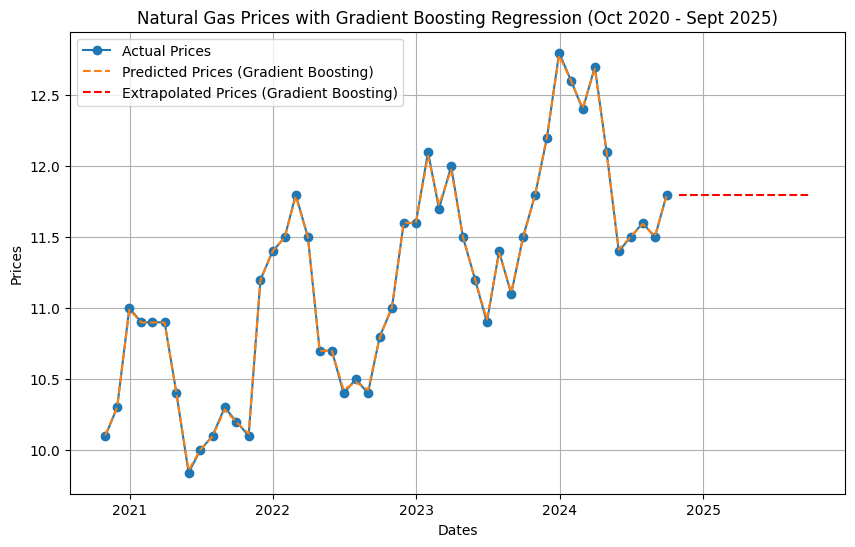

Predicted Price for 2025-01-15: 11.80


In [ ]:
# Load and preprocess data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
data = pd.read_csv('Nat_Gas.csv')
data['Dates'] = pd.to_datetime(data['Dates'])
data['Dates_ordinal'] = data['Dates'].map(pd.Timestamp.toordinal)

# Prepare data for modeling
X = data['Dates_ordinal'].values.reshape(-1, 1)
y = data['Prices'].values

# Fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X, y)

# Evaluate the model
predicted_prices_gb = gb_model.predict(X)
mse = mean_squared_error(y, predicted_prices_gb)
print(f"Mean Squared Error: {mse:.4f}")

# Extrapolate future prices for 1 year
future_dates = pd.date_range(start='2024-10-01', end='2025-09-30', freq='M')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal)
future_prices_gb = gb_model.predict(future_dates_ordinal.values.reshape(-1, 1))

# Plot actual vs predicted and future extrapolation
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices', marker='o')
plt.plot(data['Dates'], predicted_prices_gb, label='Predicted Prices (Gradient Boosting)', linestyle='--')
plt.plot(future_dates, future_prices_gb, label='Extrapolated Prices (Gradient Boosting)', linestyle='--', color='red')
plt.title('Natural Gas Prices with Gradient Boosting Regression (Oct 2020 - Sept 2025)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# Function to estimate price on any given date
def predict_price(date_str):
    input_date = pd.to_datetime(date_str)
    input_date_ordinal = input_date.toordinal()
    predicted_price = gb_model.predict(np.array([[input_date_ordinal]]))
    return predicted_price[0]

# Example: Predicting price for a specific date
input_date = '2025-01-15'
predicted_price = predict_price(input_date)
print(f"Predicted Price for {input_date}: {predicted_price:.2f}")


Task 1 – Example Answer with Python Code

In [ ]:
import os

cwd = os.getcwd()

print("Current working directory: {0}".format(cwd))

print("os.getcwd() returns an object of type {0}".format(type(cwd)))


Current working directory: /content
os.getcwd() returns an object of type <class 'str'>


In [ ]:
os.chdir ("________")

FileNotFoundError: [Errno 2] No such file or directory: '________'

<ipython-input-33-e98b3157cc2c>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_time = pd.to_datetime(date_time)
<ipython-input-33-e98b3157cc2c>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])


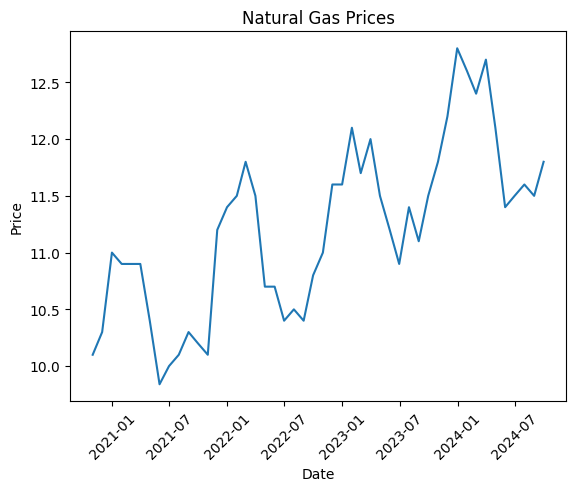

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta

date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]

df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])
prices = df['Prices'].values
dates = df['Dates'].values

# plot prices against dates
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()

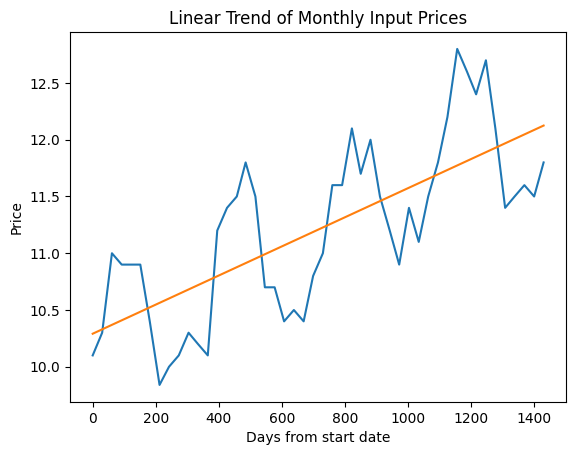

0.001282373598760221 10.29104112595228


In [ ]:

# From the plot - we can see the prices have a natural frequency of around a year, but trend upwards.
# We can do a linear regression to get the trend, and then fit a sin function to the variation in each year.

# First we need the dates in terms of days from the start, to make it easier to interpolate later.
start_date = date(2020,10,31)
end_date = date(2024,9,30)
months = []
year = start_date.year
month = start_date.month + 1
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1

days_from_start = [(day - start_date ).days for day in months]

# Simple regression for the trend will fit to a model y = Ax + B. The estimator for the slope is given by \hat{A} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2},
# and that for the intercept by \hat{B} = \bar{y} - hat{A} * \xbar

def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar))/ np.sum((x - xbar)**2)
    intercept = ybar - slope*xbar
    return slope, intercept

time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Plot linear trend
plt.plot(time, prices)
plt.plot(time, time * slope + intercept)
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.show()
print(slope, intercept)


In [ ]:
# From this plot we see the linear trend has been captured. Now to fit the intra-year variation.
# Given that natural gas is used more in winter, and less in summer, we can guess the frequency of the price movements to be about a year, or 12 months.
# Therefore we have a model y = Asin( kt + z ) with a known frequency.Rewriting y = Acos(z)sin(kt) + Asin(z)cos(kt),
# we can use bilinear regression, with no intercept, to solve for u = Acos(z), w = Asin(z)

sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / (365))
cos_time = np.cos(time * 2 * np.pi / (365))


Text(0.5, 1.0, 'Smoothed Estimate of Monthly Input Prices')

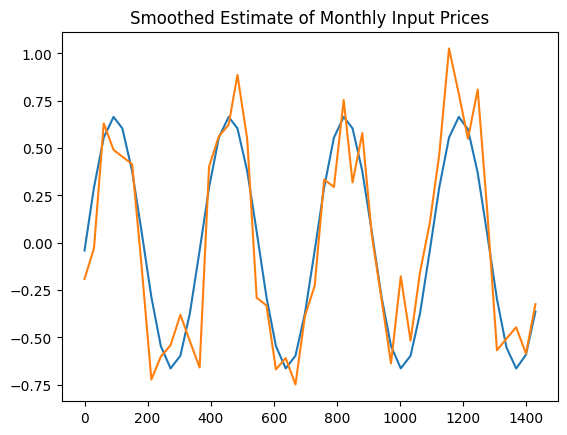

In [ ]:
def bilinear_regression(y, x1, x2):
    # Bilinear regression without an intercept amounts to projection onto the x-vectors
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return(slope1, slope2)

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)

# We now recover the original amplitude and phase shift as A = slope1 ** 2 + slope2 ** 2, z = tan^{-1}(slope2/slope1)
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)

# Plot smoothed estimate of full dataset
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift))
plt.plot(time, sin_prices)
plt.title('Smoothed Estimate of Monthly Input Prices')

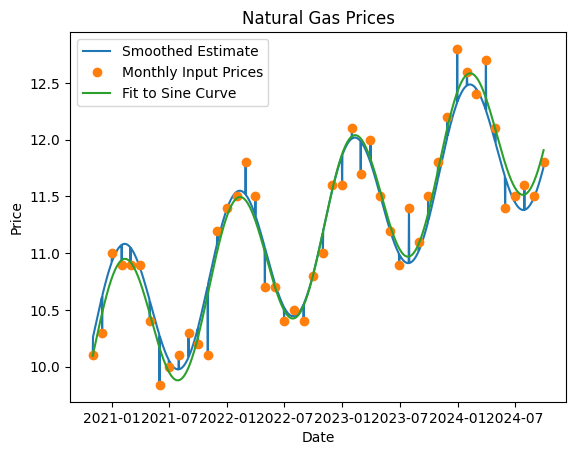

In [ ]:
# Define the interpolation/extrapolation function
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        # Exact match found in the data
        return prices[days_from_start.index(days)]
    else:
        # Interpolate/extrapolate using the sin/cos model
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

# Create a range of continuous dates from start date to end date
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Plot the smoothed estimate of the full dataset using interpolation
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')

# Fit the monthly input prices to the sine curve
x = np.array(days_from_start)
y = np.array(prices)
fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = simple_regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))
plt.plot(dates, y, 'o', label='Monthly Input Prices')
plt.plot(continuous_dates, fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.legend()
plt.show()

# Task 2 - Prototype pricing models..

In [ ]:
import pandas as pd
from datetime import datetime

# Read the Nat_Gas.csv file
def load_nat_gas_data(file_path):
    data = pd.read_csv(file_path)

    # Adjusting the date format to handle MM/DD/YY
    data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%y")
    prices = dict(zip(data['Date'].dt.strftime("%Y-%m-%d"), data['Price']))
    return prices

# Function to price gas contract
def price_gas_contract(injection_dates, withdrawal_dates, prices,
                       injection_rate, withdrawal_rate, max_storage, storage_cost):
    storage_volume = 0
    cash_flows = 0

    # Ensure all dates are in datetime format for comparison
    injection_dates = [datetime.strptime(date, "%Y-%m-%d") for date in injection_dates]
    withdrawal_dates = [datetime.strptime(date, "%Y-%m-%d") for date in withdrawal_dates]
    all_dates = sorted(set(injection_dates + withdrawal_dates))

    # Loop through each date and calculate injections, withdrawals, and storage costs
    for date in all_dates:
        date_str = date.strftime("%Y-%m-%d")

        # Handle injections
        if date in injection_dates:
            # Inject gas, but limit storage to max_storage
            volume_to_inject = min(injection_rate, max_storage - storage_volume)
            storage_volume += volume_to_inject
            cash_flows -= volume_to_inject * prices[date_str]  # Buying gas

        # Handle withdrawals
        if date in withdrawal_dates:
            # Withdraw gas, but limit withdrawal to the available storage
            volume_to_withdraw = min(withdrawal_rate, storage_volume)
            storage_volume -= volume_to_withdraw
            cash_flows += volume_to_withdraw * prices[date_str]  # Selling gas

        # Apply storage cost for the current storage volume
        cash_flows -= storage_volume * storage_cost

    return cash_flows

# Load the data from the CSV file
file_path = "Nat_Gas.csv"
nat_gas_prices = load_nat_gas_data(file_path)

# Sample test inputs
injection_dates = ["2022-11-30", "2023-01-31", "2023-03-31"]
withdrawal_dates = ["2023-06-30", "2023-09-30"]
injection_rate = 500  # Units of gas injected
withdrawal_rate = 300  # Units of gas withdrawn
max_storage = 1000  # Maximum storage capacity
storage_cost = 0.1  # Cost per unit of gas stored per day

# Calculate contract value using data from Nat_Gas.csv
contract_value = price_gas_contract(injection_dates, withdrawal_dates, nat_gas_prices,
                                    injection_rate, withdrawal_rate, max_storage, storage_cost)
print(f"Contract Value: {contract_value}")


Contract Value: -5490.0


In [ ]:
prices


array([10.1 , 10.3 , 11.  , 10.9 , 10.9 , 10.9 , 10.4 ,  9.84, 10.  ,
       10.1 , 10.3 , 10.2 , 10.1 , 11.2 , 11.4 , 11.5 , 11.8 , 11.5 ,
       10.7 , 10.7 , 10.4 , 10.5 , 10.4 , 10.8 , 11.  , 11.6 , 11.6 ,
       12.1 , 11.7 , 12.  , 11.5 , 11.2 , 10.9 , 11.4 , 11.1 , 11.5 ,
       11.8 , 12.2 , 12.8 , 12.6 , 12.4 , 12.7 , 12.1 , 11.4 , 11.5 ,
       11.6 , 11.5 , 11.8 ])

In [ ]:
#Task 2
from datetime import date
import math

def price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, total_vol, injection_withdrawal_cost_rate):
    volume = 0
    buy_cost = 0
    cash_in = 0
    last_date = min(min(in_dates), min(out_dates))

    # Ensure dates are in sequence
    all_dates = sorted(set(in_dates + out_dates))

    for i in range(len(all_dates)):
        # processing code for each date
        start_date = all_dates[i]

        if start_date in in_dates:
            # Inject on these dates and sum up cash flows
            if volume <= total_vol - rate:
                volume += rate

                # Cost to purchase gas
                buy_cost += rate * in_prices[in_dates.index(start_date)]
                # Injection cost
                injection_cost = rate * injection_withdrawal_cost_rate
                buy_cost += injection_cost
                print('Injected gas on %s at a price of %s'%(start_date, in_prices[in_dates.index(start_date)]))

            else:
                # We do not want to inject when rate is greater than total volume minus volume
                print('Injection is not possible on date %s as there is insufficient space in the storage facility'%start_date)
        elif start_date in out_dates:
            #Withdraw on these dates and sum cash flows
            if volume >= rate:
                volume -= rate
                cash_in += rate * out_prices[out_dates.index(start_date)]
                # Withdrawal cost
                withdrawal_cost = rate * injection_withdrawal_cost_rate
                cash_in -= withdrawal_cost
                print('Extracted gas on %s at a price of %s'%(start_date, out_prices[out_dates.index(start_date)]))
            else:
                # we cannot withdraw more gas than is actually stored
                print('Extraction is not possible on date %s as there is insufficient volume of gas stored'%start_date)

    store_cost = math.ceil((max(out_dates) - min(in_dates)).days // 30) * storage_cost_rate
    return cash_in - store_cost - buy_cost

# Example usage of price_contract()
in_dates = [date(2022, 1, 1), date(2022, 2, 1), date(2022, 2, 21), date(2022, 4, 1)] #injection dates
in_prices = [20, 21, 20.5, 22]#prices on the injection days
out_dates = [date(2022, 1, 27), date(2022, 2, 15), date(2022, 3, 20), date(2022, 6, 1)] # extraction dates
out_prices = [23, 19, 21, 25] # prices on the extraction days
rate = 100000  # rate of gas in cubic feet per day
storage_cost_rate = 10000  # total volume in cubic feet
injection_withdrawal_cost_rate = 0.0005  # $/cf
max_storage_volume = 500000 # maximum storage capacity of the storage facility
result = price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, max_storage_volume, injection_withdrawal_cost_rate)
print()
print(f"The value of the contract is: ${result}")




## Explaining the Methodology Adopted for this Task ##

# The given Python code implements a function `price_contract` that calculates the profit or loss obtained by
# undertaking trades on given dates for a contract involving the buying, storing, and selling of natural gas the
# storage cost of the gas, the injection/withdrawal. The value of the contract is the profit or loss obtained by
# undertaking the trades on given dates. Play around with the parameters and you'll be able to see this.
# In the end the intent for this function returns the value of the contract.
#The function takes in eight inputs:
#- `in_dates`: A list of dates on which the gas is being injected into the storage facility.
#- `in_prices`: A list of prices of gas on each of the injection dates.
#- `out_dates`: A list of dates on which the gas is being withdrawn from the storage facility.
#- `out_prices`: A list of prices of gas on each of the withdrawal dates.
#- `rate`: The rate of gas in cubic feet per day.
#- `storage_cost_rate`: A fixed monthly fee to store the gas
#- `total_vol`: The total volume of gas in cubic feet that can be stored.
#- `injection_withdrawal_cost_rate`: The injection/withdrawal cost of gas in dollars per cubic foot.

# The function first ensures that all the dates are in sequence and sorted in ascending order. Then, it iterates
#over all the dates and calculates the cash flows on each date. If the current date is an injection date, it
#injects gas into the storage facility and calculates the cost to store the gas, the cost to purchase the gas,
#and the injection cost. If the current date is a withdrawal date, it withdraws gas from the storage facility and
#calculates the cash inflow from selling the gas, the cost to store the remaining gas, and the withdrawal cost.

# Finally, the function returns the net profit or loss by subtracting the storage cost and the cost to purchase
#the gas from the cash inflow from selling the gas.

# The example usage of the `price_contract` function calculates the profit or loss for a contract that involves
#injecting gas on four different dates and withdrawing gas on four different dates, each with a different price.
#The other inputs such as the rate of gas, the storage cost rate, the total volume, and the injection/withdrawal
#cost rate are also provided. The output is printed to the console using an f-string.


Injected gas on 2022-01-01 at a price of 20
Extracted gas on 2022-01-27 at a price of 23
Injected gas on 2022-02-01 at a price of 21
Extracted gas on 2022-02-15 at a price of 19
Injected gas on 2022-02-21 at a price of 20.5
Extracted gas on 2022-03-20 at a price of 21
Injected gas on 2022-04-01 at a price of 22
Extracted gas on 2022-06-01 at a price of 25

The value of the contract is: $399600.0


***Task 3 - Predictive default probability***

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Load the data
df = pd.read_csv('Loan_Data.csv')

# Handling missing values (if any)
df.fillna(df.median(), inplace=True)

# Extract features and target variable
X = df.drop(columns=['customer_id', 'default'])
y = df['default']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)

# Random Forest
forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest_model.fit(X_train, y_train)

# Model Evaluation
logistic_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
tree_pred_proba = tree_model.predict_proba(X_test)[:, 1]
forest_pred_proba = forest_model.predict_proba(X_test)[:, 1]

# Calculating AUC-ROC scores
logistic_auc = roc_auc_score(y_test, logistic_pred_proba)
tree_auc = roc_auc_score(y_test, tree_pred_proba)
forest_auc = roc_auc_score(y_test, forest_pred_proba)

print(f"Logistic Regression AUC: {logistic_auc:.4f}")
print(f"Decision Tree AUC: {tree_auc:.4f}")
print(f"Random Forest AUC: {forest_auc:.4f}")

# Expected Loss Calculation Function
def expected_loss(model, loan_features, recovery_rate=0.10):
    """
    This function calculates the expected loss on a loan given a model and loan features.

    Parameters:
    - model: Trained model to predict the probability of default
    - loan_features: Features of the loan as a numpy array
    - recovery_rate: The recovery rate on defaulted loans (default is 10%)

    Returns:
    - Expected loss on the loan
    """
    prob_of_default = model.predict_proba(loan_features.reshape(1, -1))[:, 1][0]
    expected_loss_value = prob_of_default * (1 - recovery_rate)
    return expected_loss_value





Logistic Regression AUC: 1.0000
Decision Tree AUC: 0.9958
Random Forest AUC: 0.9993


In [ ]:
# Example Usage
# Ensure the new borrower's data matches the number of features (excluding 'customer_id' and 'default')
# Let's assume the correct number of features is 6 (based on the original feature set)
new_loan_features = np.array([20000, 50000, 100000, 75000, 8, 720])  # Example features (6 features)

# Scale the new loan features
new_loan_features_scaled = scaler.transform(new_loan_features.reshape(1, -1))

# Calculate Expected Loss using the best model (Random Forest in this case)
best_model = forest_model
loss = expected_loss(best_model, new_loan_features_scaled[0])

print(f"Expected Loss on the Loan: {loss:.4f}")


Expected Loss on the Loan: 0.7591


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd

# Read in loan data from a CSV file
df = pd.read_csv('Loan_Data.csv')

# Define the variable features
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

# Calculate the payment_to_income ratio
df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']

# Calculate the debt_to_income ratio
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']

clf = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000).fit(df[features], df['default'])
print(clf.coef_, clf.intercept_)

# Use the following code to check yourself
y_pred = clf.predict(df[features])

fpr, tpr, thresholds = metrics.roc_curve(df['default'], y_pred)
print((1.0*(abs(df['default']-y_pred)).sum()) / len(df))
print(metrics.auc(fpr, tpr))

[[ 8.18520373  0.54490854  0.01994244 -2.77630853 -0.02418391]] [-0.09162643]
0.0037
0.9925106069101026


In [ ]:
import numpy as np
import pandas as pd

def calculate_default_rate(df, bucket_indices):
    """
    Calculate the default rate for each bucket defined by bucket_indices.

    Args:
        df (DataFrame): DataFrame containing FICO scores and default status.
        bucket_indices (list): List of indices indicating the boundaries of buckets.

    Returns:
        default_rates (list): List of default rates for each bucket.
    """
    default_rates = []
    for i in range(len(bucket_indices) - 1):
        bucket_data = df[(df['fico_score'] >= bucket_indices[i]) & (df['fico_score'] < bucket_indices[i+1])]
        defaults = bucket_data['default'].sum()
        total = len(bucket_data)
        if total > 0:
            default_rate = defaults / total
        else:
            default_rate = 0
        default_rates.append(default_rate)
    return default_rates

def mean_squared_error(default_rates):
    """
    Calculate the mean squared error of the default rates in the buckets.

    Args:
        default_rates (list): List of default rates for each bucket.

    Returns:
        mse (float): Mean squared error of the default rates.
    """
    mean_rate = np.mean(default_rates)
    mse = np.mean((np.array(default_rates) - mean_rate) ** 2)
    return mse

def optimize_buckets(df, num_buckets):
    """
    Optimize the bucket boundaries using dynamic programming.

    Args:
        df (DataFrame): DataFrame containing FICO scores and default status.
        num_buckets (int): Number of buckets to divide the FICO scores into.

    Returns:
        optimal_boundaries (list): List of optimal bucket boundaries.
    """
    # Sort FICO scores
    df = df.sort_values(by='fico_score')
    fico_scores = df['fico_score'].values
    n = len(fico_scores)

    # Initialize dynamic programming table
    dp = [[float('inf')] * (num_buckets + 1) for _ in range(n + 1)]
    bucket_boundaries = [[None] * (num_buckets + 1) for _ in range(n + 1)]

    # Base case: 0 buckets
    for i in range(n + 1):
        dp[i][0] = 0

    # Fill DP table
    for k in range(1, num_buckets + 1):
        for i in range(1, n + 1):
            for j in range(i):
                bucket_indices = [0] + list(range(j, i))
                default_rates = calculate_default_rate(df.iloc[j:i], bucket_indices)
                error = mean_squared_error(default_rates)
                if dp[j][k-1] + error < dp[i][k]:
                    dp[i][k] = dp[j][k-1] + error
                    bucket_boundaries[i][k] = j

    # Backtrack to find the optimal boundaries
    optimal_boundaries = [n]
    k = num_buckets
    while k > 0:
        optimal_boundaries.append(bucket_boundaries[optimal_boundaries[-1]][k])
        k -= 1
    optimal_boundaries.reverse()

    return optimal_boundaries

In [ ]:
# Load the dataset
df = pd.read_csv('Loan_Data.csv')

# Optimize the buckets for FICO scores into 5 buckets
optimal_boundaries = optimize_buckets(df, 2)

print("Optimal Bucket Boundaries:", optimal_boundaries)


KeyboardInterrupt: 

**Task 4 – Example Answer with Python **

In [ ]:

import pandas as pd
from math import log
import os



df = pd.read_csv('Loan_Data.csv')

x = df['default'].to_list()
y = df['fico_score'].to_list()
n = len(x)
print (len(x), len(y))

default = [0 for i in range(851)]
total = [0 for i in range(851)]

for i in range(n):
    y[i] = int(y[i])
    default[y[i]-300] += x[i]
    total[y[i]-300] += 1

for i in range(0, 551):
    default[i] += default[i-1]
    total[i] += total[i-1]

import numpy as np

def log_likelihood(n, k):
    p = k/n
    if (p==0 or p==1):
        return 0
    return k*np.log(p)+ (n-k)*np.log(1-p)

r = 10
dp = [[[-10**18, 0] for i in range(551)] for j in range(r+1)]

for i in range(r+1):
    for j in range(551):
        if (i==0):
            dp[i][j][0] = 0
        else:
            for k in range(j):
                if (total[j]==total[k]):
                    continue
                if (i==1):
                    dp[i][j][0] = log_likelihood(total[j], default[j])
                else:
                    if (dp[i][j][0] < (dp[i-1][k][0] + log_likelihood(total[j]-total[k], default[j] - default[k]))):
                        dp[i][j][0] = log_likelihood(total[j]-total[k], default[j]-default[k]) + dp[i-1][k][0]
                        dp[i][j][1] = k

print (round(dp[r][550][0], 4))

k = 550
l = []
while r >= 0:
    l.append(k+300)
    k = dp[r][k][1]
    r -= 1

print(l)

# The provided code performs data analysis by calculating the probability of default for a given set of observations. The technique used for this analysis is maximum likelihood estimation. The intuition behind the usage of maximum likelihood estimation is that it is a common method for estimating the parameters of a statistical model. In this case, the parameters are the probabilities of default for different sets of observations. Maximum likelihood estimation seeks to find the parameter values that maximize the likelihood function for the observed data.

# The code first reads in a CSV file using Pandas. It then creates two lists, x and y, that correspond to the 'observation' and 'rank' columns in the data, respectively. These lists are then used to calculate the default and total values for each rank in the data.

# The log-likelihood function is defined to calculate the likelihood of a given set of parameters. The likelihood function is used to calculate the probability of observing the data given the parameter values. The code then initializes a three-dimensional array, dp, that is used to store the calculated log-likelihood values for different sets of observations. The first dimension represents the number of iterations performed, the second dimension represents the rank of the observation, and the third dimension represents the log-likelihood and the index of the previous observation.

# Finally, the code calculates the log-likelihood for the given data set by using the dp array. It then prints the results and outputs the indices of the observations that were used in the calculation.


10000 10000
-4217.8245
[850, 753, 752, 732, 696, 649, 611, 580, 552, 520, 300]


Resume Snippet:

JPMorgan Chase & Co. Quantitative Research Virtual Experience Program on Forage

September 2024

Completed a simulation focused on quantitative research methods
Analyzed a book of loans to estimate a customer's probability of default
Used dynamic programming to convert FICO scores into categorical data to predict defaults
Interview Tip:

“Why are you interested in this role?”

I recently participated in JPMorgan Chase & Co.'s Quantitative Research virtual job simulation on the Forage platform, and it was incredibly useful to understand what it might be like to work on a Quantitative Research team at JPMorgan Chase & Co. I worked on a project that involved forecasting and predictive modeling. I practiced using advanced Python code and built my data analysis and modeling skills in a real-world context. Doing this program confirmed that I really enjoy manipulating large data sets to inform business solutions and I’m excited to apply these skills on the Quantitative Research team at JPMorgan Chase & Co.

https://www.theforage.com/achievements